# Random Forest Regressor - Predicting Future Stock Price

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [3]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv") 
stock_prices = stock_prices.set_index("Date")
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices.head()

,Adj Close,Return
Date,,
2015-08-10,143.419998,-0.090564
2015-08-11,142.800003,-0.432293
2015-08-12,141.600006,-0.840334
2015-08-13,141.949997,0.247169
2015-08-14,142.570007,0.436781


In [4]:
# Create a lagged return using the shift function
stock_prices["Lagged_Return"] = stock_prices["Return"].shift(1)

stock_prices.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2021-07-13,279.209991,-0.321300,-0.135479
2021-07-14,278.309998,-0.322336,-0.321300
2021-07-15,279.720001,0.506631,-0.322336
2021-07-16,277.899994,-0.650653,0.506631
2021-07-19,272.660004,-1.885567,-0.650653


In [5]:
# Create a train/test split for the data using 2021 for testing and the rest for training
train = stock_prices[:'2021'].dropna()
test = stock_prices['2021':]

In [6]:
train.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2020-12-24,226.529999,1.021224,1.063638
2020-12-28,228.410004,0.829914,1.021224
2020-12-29,229.570007,0.507860,0.829914
2020-12-30,229.649994,0.034842,0.507860
2020-12-31,231.869995,0.966689,0.034842


In [7]:
test.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2021-07-13,279.209991,-0.321300,-0.135479
2021-07-14,278.309998,-0.322336,-0.321300
2021-07-15,279.720001,0.506631,-0.322336
2021-07-16,277.899994,-0.650653,0.506631
2021-07-19,272.660004,-1.885567,-0.650653


In [8]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Return"), Y_test (test set of just the "y" variable):
X_train = pd.DataFrame(train["Lagged_Return"])
X_test = pd.DataFrame(test["Lagged_Return"])
y_train = pd.DataFrame(train["Return"])
y_test = pd.DataFrame(test["Return"])

In [9]:
# Create a Random Forest Regression model and fit it to the training data
from sklearn.ensemble import RandomForestRegressor

# Fit a SKLearn Random Forest regressor using just the training set (X_train, Y_train)
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

In [10]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,-0.311872
1,-1.076525
2,0.070622
3,0.969626
4,-0.094184


In [11]:
y_test.head()

,Return
Date,
2021-01-04,-1.474964
2021-01-05,-0.428976
2021-01-06,1.230933
2021-01-07,1.133452
2021-01-08,0.493814


In [12]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [13]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = pd.DataFrame(y_test)
Results["Predicted Return"] = predictions
Results[:20]

,Return,Predicted Return
Date,,
2021-01-04,-1.474964,-0.311872
2021-01-05,-0.428976,-1.076525
2021-01-06,1.230933,0.070622
2021-01-07,1.133452,0.969626
2021-01-08,0.493814,-0.094184
2021-01-11,-0.256380,0.604903
2021-01-12,-0.171355,-0.542527
2021-01-13,0.635110,-0.749846
2021-01-14,0.217479,2.025778


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

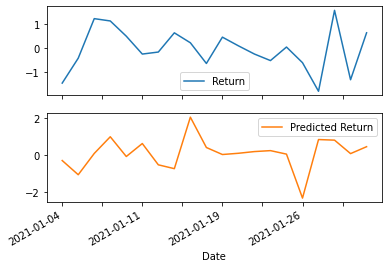

In [14]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

In [15]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"])
print(f"Mean Squared Error = {mse}")

Mean Squared Error = 1.9984291864885335


In [16]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.4136580868401432


In [17]:
# Construct a dataframe using just the "y" training data:
in_sample_results = pd.DataFrame(y_train)

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Return"],in_sample_results["In-sample Predictions"])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.6012490721029692


In [17]:
# Based on this dataset and model setup, the model is not able to predict future prices (out-of-sample error is much higher than in-sample error). We need to tweak the timeframe as well as model hyperparameters to see if we can improve the model performance.